In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("./data/p1.csv", parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
y = df['Close_diff']
y.head()


Date
2006-01-31         NaN
2006-02-28    1.090947
2006-03-31   -1.237643
2006-04-30    0.016064
2006-05-31   -0.300550
Name: Close_diff, dtype: float64

In [3]:
train_size = int(len(y) * 0.8)

train = y[:train_size]
test = y[train_size:]

In [10]:
model = ARIMA(train, order=(1,0,1))
result = model.fit()

next_steps = len(test)
forecast = result.forecast(steps=next_steps)

residuals = test - forecast

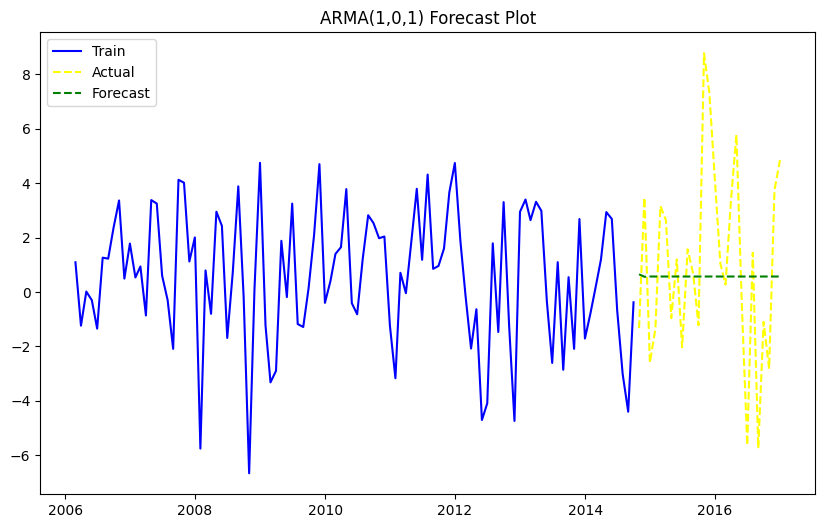

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(train, color='blue', label='Train')
plt.plot(test, color='yellow', label='Actual', linestyle='--')
plt.plot(forecast, color='green', label='Forecast', linestyle='--')
plt.title("ARMA(1,0,1) Forecast Plot")
plt.legend()
plt.show()

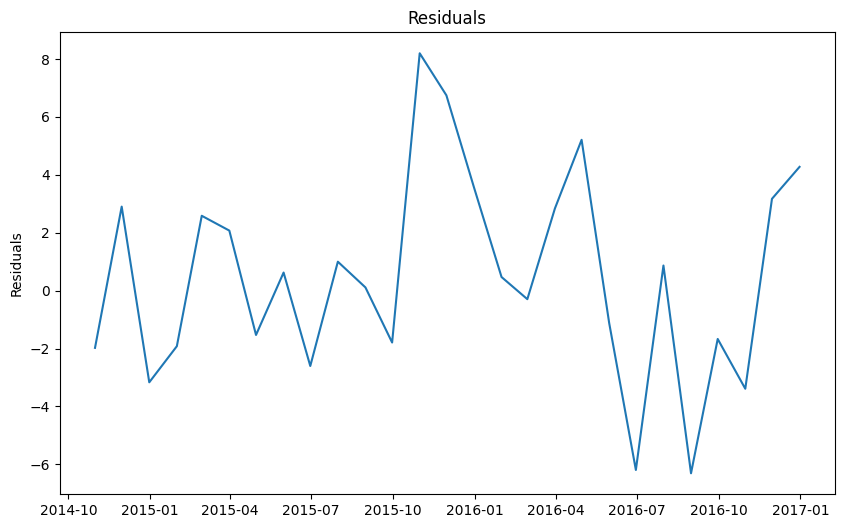

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals")
plt.ylabel("Residuals")
plt.show()

In [13]:
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
rmse = (mean_squared_error(test, forecast) ** 0.5)

print("MAE (Mean Absolute Error) :", mae)
print("MAPE (Mean Absolute Percentage Error)", mape)
print("RMSE (Root Mean Squared Error) ", rmse )

MAE (Mean Absolute Error) : 2.837020807744167
MAPE (Mean Absolute Percentage Error) 1.0185444555793
RMSE (Root Mean Squared Error)  3.5194601104620564
